# Piecewise Linear Regression Demo

Note: Piecewise is mostly not used by itself. Most of regression technique assumes independent variables to have linear boundry. Piecewise can be used to break up non-linear features on breakpoint to create linear interpretation or used to segment key features that can further be used to fit individual models

Importing required libraries. We will use pwlf python library to demonstrate simple piecewise linear regression

In [1]:
import pwlf
import matplotlib.pyplot as plt
import numpy as np

Let us first generate a sample dataset and define ponts with non linear boundry. We will use the data to fit piecewise regression and also linear regression 

In [2]:
y_train = np.array([1.70, 1.45, 1.50, 1.42, 1.39, 1.90, 2.49, 2.21, 2.57, 2.90, 3.55, 3.80, 4.27, 4.10, 4.60, 4.42, 4.30, 4.52, 4.40, 4.50, 4.15,4.30,4.35], order=None)
x_train = np.array([478, 525, 580,  650,  700,  720,  780,  825,  850,  900,  930,  980, 1020, 1040, 1050, 1075, 1081, 1100, 1160, 1180, 1200,1220,1240], order=None)  

## Visualize generated dataset

From the plot it is very evident that fitting an linear regression line might result in larger standard error. Option is to go to slightly complex algorithm like SVM and Tree that can fit non linear boundry. But for here let us see if we can use piecewise linear regression to better fit the data

Simpler models are better interpretable and explainable. Scenario like credit decisioning which are regulated by fair act lending law explainability is key. If we visualize credit approval based on FICO as independent variable and probability of default as dependent, decision will always tend to favor high FICO score customers when using linear regression models

One way of solving below decision boundry is to segment users manually (in above case FICO score) and fit linear models for individual segments

Piecewise does something similar but uses a global optimization to find breakpoint locations that minimize the sum of squares error.

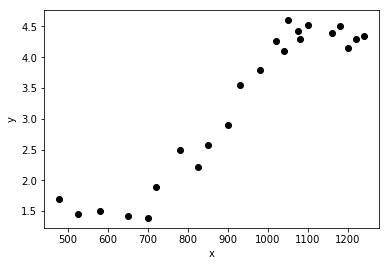

In [3]:
plt.plot(x_train, y_train, 'o', color='black')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Initialize piecewise linear fit with x_train and y_train data point

In [4]:
pwlf = pwlf.PiecewiseLinFit(x_train, y_train)

From the plot above it is evident we can fit the data using 3 regression lines

In [5]:
pwise_model = pwlf.fit(3)

Generate evenly spaced test dataset to check model fit similar to training interval <br/>
Predict on generated test data

In [6]:
x_test = np.linspace(min(x_train), max(x_train), num=100)
yHat_piecewise = pwlf.predict(x_test)

Plot the results of piecewise fitted model

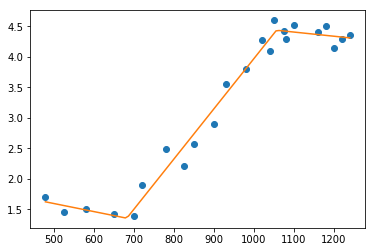

In [7]:
plt.figure()
plt.plot(x_train, y_train, 'o')
plt.plot(x_test, yHat_piecewise, '-')
plt.show()

## Get details of piecewise breakpoint boundry and model co-efficients 

fit_breaks extracts 3 regression breakpoint model was fitted on

Each break defines the segment of data individual linear regression line is fitted on <br/>
First line is fitted on X data point 0 till 478 <br/>
Second line is fitted on X data point between 479 to 681.67 <br/>
Third line is fitted on X data point between 681.68 till 1056.53

In [8]:
pwlf.fit_breaks[0]

478.0

In [9]:
pwlf.fit_breaks[1]

681.6752402750844

In [10]:
pwlf.fit_breaks[2]

1056.5382951233303

## Co-efficients and Intercepts of every fitted line. In this case 3

In [24]:
pwlf.slopes

array([-0.00131881,  0.00821945, -0.00068192])

In [23]:
pwlf.intercepts

array([ 2.25382915, -4.24817018,  5.1564764 ])

That's end of piecewise regression. You can follow below to see what single regression line would have done in this case

## Check for bonus material towards the end on how to deploy piecewise in production

# Simple Linear regression Just to compare the fit with piecewise plot above

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
x_train=x_train.reshape((x_train.size,1))
y_train=y_train.reshape((y_train.size,1))
x_test=x_test.reshape((x_test.size,1))

In [15]:
reg_model = LinearRegression().fit(x_train, y_train)

In [16]:
yHat_reg=reg_model.predict(x_test)

Based on plot below we can see single regression line has higher standard error 

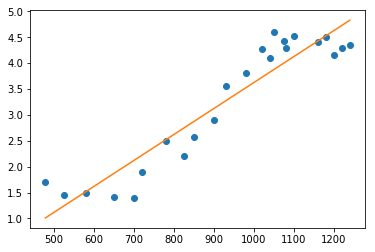

In [17]:
plt.figure()
plt.plot(x_train, y_train, 'o')
plt.plot(x_test, yHat_reg, '-')
plt.show()

In [18]:
reg_model.coef_

array([[0.00501184]])

## Bonus  - Deploying piecewise in production

## While the biggest bonus is this is not overfitting line. Piecewise generalizes very well. Try it out if you dont trust me

Deploying is as simple as building an hirearchical tree of each piecewise fitted regression model <br/>
Remember from top the 3 segment the mocel was fitted on <br/>
First line is fitted on X data point 0 till 478 <br/>
Second line is fitted on X data point between 479 to 681.67 <br/>
Third line is fitted on X data point between 681.68 till 1056.53 <br/>

And the intercepts and co-eeficient for 3 regression line are <br/>
Intercepts - array([ 2.25382915, -4.24817018,  5.1564764 ]) <br/>
Co-efficients - array([-0.00131881,  0.00821945, -0.00068192])

In application just use the below to deploy it within your business process

if x < 478  <br/>
    y_pred = 2.25382915 + x &#8727; -0.00131881 <br/>
else if x > 478 and x <= 681.67 <br/>
    y_pred = -4.24817018 + x &#8727; 0.00821945 <br/>
else <br/>
    y_pred = 5.1564764 + x &#8727; -0.00068192


Another way is to use below equation but in this case you are assuming you are calculation prediction for all 3 classes

pf(x) = y1 &#8727; max(x − breakpoint1, 0) + y2 &#8727; max(x − breakpoint2, 0) + y3 &#8727; max(x − breakpoint3, 0)